<a href="https://colab.research.google.com/github/dan9133/Pyspark_Data_Analyse_Projects/blob/main/Pysprk_projects_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:- The objective of this PySpark project is to analyze the France football Bundesliga matches dataset to derive valuable insights and perform statistical analysis**

**Install the PIP for pyspark**

In [ ]:
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=fae24114b3b30cfb8415b0ce5ab104019e65b82c778fa59d20fb53b88b1bb17e
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


**Import all labrairies of python/pyspark**

In [ ]:
import findspark
from pyspark import SparkContext
from pyspark.sql import SparkSession, Window, Row
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession \
        .builder \
        .appName("firstSpark") \
        .getOrCreate()

**Loading the data  into dataframe**

In [ ]:
def load_dataframe(filename):
    df = spark.read.format('csv').options(header='true').load(filename)
    return df

#creating a dataframe
df_matches = load_dataframe('/content/Matches.csv')
df_matches.show()

+--------+---+------+----------+------------------+--------------+----+----+---+
|Match_ID|Div|Season|      Date|          HomeTeam|      AwayTeam|FTHG|FTAG|FTR|
+--------+---+------+----------+------------------+--------------+----+----+---+
|       1| D2|  2009|2010-04-04|        Oberhausen|Kaiserslautern|   2|   1|  H|
|       2| D2|  2009|2009-11-01|       Munich 1860|Kaiserslautern|   0|   1|  A|
|       3| D2|  2009|2009-10-04|     Frankfurt FSV|Kaiserslautern|   1|   1|  D|
|       4| D2|  2009|2010-02-21|     Frankfurt FSV|     Karlsruhe|   2|   1|  H|
|       5| D2|  2009|2009-12-06|             Ahlen|     Karlsruhe|   1|   3|  A|
|       6| D2|  2009|2010-04-03|      Union Berlin|     Karlsruhe|   1|   1|  D|
|       7| D2|  2009|2009-08-14|         Paderborn|     Karlsruhe|   2|   0|  H|
|       8| D2|  2009|2010-03-08|         Bielefeld|     Karlsruhe|   0|   1|  A|
|       9| D2|  2009|2009-09-26|    Kaiserslautern|     Karlsruhe|   2|   0|  H|
|      10| D2|  2009|2009-11

In [ ]:
# shw only top 5
df_matches.limit(5).show()

+--------+---+------+----------+-------------+--------------+----+----+---+
|Match_ID|Div|Season|      Date|     HomeTeam|      AwayTeam|FTHG|FTAG|FTR|
+--------+---+------+----------+-------------+--------------+----+----+---+
|       1| D2|  2009|2010-04-04|   Oberhausen|Kaiserslautern|   2|   1|  H|
|       2| D2|  2009|2009-11-01|  Munich 1860|Kaiserslautern|   0|   1|  A|
|       3| D2|  2009|2009-10-04|Frankfurt FSV|Kaiserslautern|   1|   1|  D|
|       4| D2|  2009|2010-02-21|Frankfurt FSV|     Karlsruhe|   2|   1|  H|
|       5| D2|  2009|2009-12-06|        Ahlen|     Karlsruhe|   1|   3|  A|
+--------+---+------+----------+-------------+--------------+----+----+---+



In [ ]:
df_matches.describe()

DataFrame[summary: string, Match_ID: string, Div: string, Season: string, Date: string, HomeTeam: string, AwayTeam: string, FTHG: string, FTAG: string, FTR: string]

In [ ]:
# to find the all data types values
df_matches.printSchema()

root
 |-- Match_ID: string (nullable = true)
 |-- Div: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- HomeTeam: string (nullable = true)
 |-- AwayTeam: string (nullable = true)
 |-- FTHG: string (nullable = true)
 |-- FTAG: string (nullable = true)
 |-- FTR: string (nullable = true)



In [ ]:
# show the data types
df_matches.dtypes

[('Match_ID', 'string'),
 ('Div', 'string'),
 ('Season', 'string'),
 ('Date', 'string'),
 ('HomeTeam', 'string'),
 ('AwayTeam', 'string'),
 ('FTHG', 'string'),
 ('FTAG', 'string'),
 ('FTR', 'string')]

**Rename the few columns data in dataframe**

In [ ]:
old_cols = df_matches.columns[-3:]
new_cols = ["HomeTeamGoals", "AwayTeamGoals", "FinalResult"]
old_new_cols = [*zip(old_cols, new_cols)]
for old_col, new_col in old_new_cols:
    df_matches = df_matches.withColumnRenamed(old_col, new_col)

df_matches.limit(5).toPandas()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,HomeTeamGoals,AwayTeamGoals,FinalResult
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


**Answering Questions**

**Q1- Who are the winners of the D1 division in the Germany Football Association (Bundesliga) between 2000-2010?**

In [ ]:
df_matches = df_matches \
    .withColumn('hometeamwin', when(col('finalresult') == 'H', 1).otherwise(0)) \
    .withColumn('awayteamwin', when(col('finalresult') == 'A', 1).otherwise(0)) \
    .withColumn('gametie', when(col('finalresult') == 'D', 1).otherwise(0))

D1division = df_matches \
                    .filter((col('Season')>=2000)&
                            (col('Season')<=2010)&
                            (col('Div')=='D1'))


home1 = D1division.groupby('Season', 'HomeTeam') \
        .agg(sum('hometeamwin').alias('totalhomewin'),
             sum('awayteamwin').alias('totalhomeloss'),
             sum('gametie').alias('totalhometie'),
             sum('hometeamgoals').alias('homescoredgoals'),
             sum('awayteamgoals').alias('homeagainstgoals')) \
        .withColumnRenamed('HomeTeam', 'team')

away1 = D1division.groupby('Season', 'AwayTeam') \
        .agg(sum('awayteamwin').alias('totalawaywin'),
             sum('hometeamwin').alias('totalawayloss'),
             sum('gametie').alias('totalawaytie'),
             sum('awayteamgoals').alias('awayscoredgoals'),
             sum('hometeamgoals').alias('awayagainstgoals')) \
        .withColumnRenamed('AwayTeam', 'team')

In [ ]:
# action perform in pyspark
home1.show(5)

+------+--------------+------------+-------------+------------+---------------+----------------+
|Season|          team|totalhomewin|totalhomeloss|totalhometie|homescoredgoals|homeagainstgoals|
+------+--------------+------------+-------------+------------+---------------+----------------+
|  2005|Kaiserslautern|           5|            7|           5|           26.0|            33.0|
|  2006|       Cottbus|           6|            6|           5|           21.0|            22.0|
|  2001|      St Pauli|           4|            9|           4|           19.0|            28.0|
|  2005|         Mainz|           6|            4|           7|           31.0|            23.0|
|  2006|       Hamburg|           4|            4|           9|           22.0|            19.0|
+------+--------------+------------+-------------+------------+---------------+----------------+
only showing top 5 rows



In [ ]:
away1.show(5)

+------+--------------+------------+-------------+------------+---------------+----------------+
|Season|          team|totalawaywin|totalawayloss|totalawaytie|awayscoredgoals|awayagainstgoals|
+------+--------------+------------+-------------+------------+---------------+----------------+
|  2005|Kaiserslautern|           3|           10|           4|           21.0|            38.0|
|  2006|       Cottbus|           5|            9|           3|           17.0|            27.0|
|  2001|      St Pauli|           0|           11|           6|           18.0|            42.0|
|  2005|         Mainz|           3|           10|           4|           15.0|            24.0|
|  2006|       Hamburg|           6|            5|           6|           21.0|            18.0|
+------+--------------+------------+-------------+------------+---------------+----------------+
only showing top 5 rows



In [ ]:
# Rename season features
window=['Season']
window = Window.partitionBy(window).orderBy(col('winpct').desc(), col('goaldifferentials').desc())
tabledetails2010 = home1.join(away1,['Team', 'Season'],'inner') \
    .withColumn('goalsscored', col('homescoredgoals')+ col('awayscoredgoals')) \
    .withColumn('goalsagainst', col('homeagainstgoals')+col('awayagainstgoals')) \
    .withColumn('goaldifferentials', col('goalsscored')-col('goalsagainst')) \
    .withColumn('win', col('totalhomewin')+col('totalawaywin')) \
    .withColumn('loss', col('totalhomeloss')+col('totalawayloss')) \
    .withColumn('tie', col('totalhometie')+col('totalawaytie')) \
    .withColumn('winpct', round((100*col('win')/(col('win')+col('loss')+ col('tie'))),2)) \
    .drop('homescoredgoals', 'awayscoredgoals', 'homeagainstgoals', 'awayagainstgoals') \
    .drop('totalhomewin','totalawaywins', 'totalhomeloss','totalawayloss','totalhometie','totalawaytie') \
    .withColumn('teamposition', rank().over(window))

tabledetails2010_df= tabledetails2010.filter(col('teamposition')==1).orderBy(desc('Season')).toPandas()
tabledetails2010_df

,team,Season,totalawaywin,goalsscored,goalsagainst,goaldifferentials,win,loss,tie,winpct,teamposition
0,Dortmund,2010,11,67.0,22.0,45.0,23,5,6,67.65,1
1,Bayern Munich,2009,8,72.0,31.0,41.0,20,4,10,58.82,1
2,Wolfsburg,2008,5,80.0,41.0,39.0,21,7,6,61.76,1
3,Bayern Munich,2007,10,68.0,21.0,47.0,22,2,10,64.71,1
4,Stuttgart,2006,9,61.0,37.0,24.0,21,6,7,61.76,1
5,Bayern Munich,2005,8,67.0,32.0,35.0,22,3,9,64.71,1
6,Bayern Munich,2004,10,75.0,33.0,42.0,24,5,5,70.59,1
7,Werder Bremen,2003,11,79.0,38.0,41.0,22,4,8,64.71,1
8,Bayern Munich,2002,10,70.0,25.0,45.0,23,5,6,67.65,1
9,Leverkusen,2001,7,77.0,38.0,39.0,21,7,6,61.76,1


**Bayern Munich won 6 times in D1 division between 2000-2010 in German Football association.**

**Q2. Which teams have been relegated in the past 10 years?**

**Identify Relegated Teams: Determine the teams that were relegated in each season based on their final standings in the league table. In Ligue 1, typically the bottom three or four teams get relegated, but this may vary depending on the season and league rules**

In [ ]:
lastdecadebundesliga= df_matches.filter((col('Season')>=2007)&
                                        (col('Season')<=2017)&
                                        (col('Div')=='D1'))

In [ ]:
home2 = lastdecadebundesliga.groupby('Season', 'HomeTeam') \
        .agg(sum('hometeamwin').alias('totalhomewin'),
             sum('awayteamwin').alias('totalhomeloss'),
             sum('gametie').alias('totalhometie'),
             sum('hometeamgoals').alias('homescoredgoals'),
             sum('awayteamgoals').alias('homeagainstgoals')) \
        .withColumnRenamed('HomeTeam', 'team')

In [ ]:
away2 = lastdecadebundesliga.groupby('Season', 'AwayTeam') \
        .agg(sum('awayteamwin').alias('totalawaywin'),
             sum('hometeamwin').alias('totalawayloss'),
             sum('gametie').alias('totalawaytie'),
             sum('awayteamgoals').alias('awayscoredgoals'),
             sum('hometeamgoals').alias('awayagainstgoals')) \
        .withColumnRenamed('AwayTeam', 'team')

**Winning team gets 3 points**

**Losing team gets 0 points**

**Game tie then both teams get 1 point each**

In [ ]:
home2.sort('Season').toPandas()

,Season,team,totalhomewin,totalhomeloss,totalhometie,homescoredgoals,homeagainstgoals
0,2007,Hansa Rostock,5,8,4,17.0,21.0
1,2007,Cottbus,8,7,2,25.0,20.0
2,2007,Bochum,5,3,9,32.0,28.0
3,2007,Ein Frankfurt,8,5,4,24.0,24.0
4,2007,Stuttgart,12,3,2,39.0,19.0
...,...,...,...,...,...,...,...
193,2017,FC Koln,17,0,0,-17.0,-17.0
194,2017,Wolfsburg,17,0,0,-17.0,-17.0
195,2017,Dortmund,17,0,0,-17.0,-17.0
196,2017,Freiburg,17,0,0,-17.0,-17.0


In [ ]:
away2.sort('Season').toPandas()

,Season,team,totalawaywin,totalawayloss,totalawaytie,awayscoredgoals,awayagainstgoals
0,2007,Hansa Rostock,3,12,2,13.0,31.0
1,2007,Cottbus,1,9,7,10.0,36.0
2,2007,Bochum,5,10,2,16.0,26.0
3,2007,Ein Frankfurt,4,7,6,19.0,26.0
4,2007,Stuttgart,4,11,2,18.0,38.0
...,...,...,...,...,...,...,...
193,2017,FC Koln,0,17,0,-17.0,-17.0
194,2017,Wolfsburg,0,17,0,-17.0,-17.0
195,2017,Dortmund,0,17,0,-17.0,-17.0
196,2017,Freiburg,0,17,0,-17.0,-17.0


**These teams were relegated in the last decade(2007-2017).**

In [ ]:
window=['Season']
window = Window.partitionBy('Season').orderBy(col('totalpoints').desc(), col('goaldifferentials'))

team_details = home2.join(away2, ['Season', 'Team'], 'inner') \
            .withColumn('goalsscored', col('homescoredgoals')+col('awayscoredgoals')) \
            .withColumn('goalsagainst', col('homeagainstgoals')+col('awayagainstgoals')) \
            .withColumn('goaldifferentials', col('goalsscored')-col('goalsagainst')) \
            .withColumn('win', col('totalhomewin')+col('totalawaywin')) \
            .withColumn('loss', col('totalhomeloss')+col('totalawayloss')) \
            .withColumn('tie', col('totalhometie')+col('totalawaytie')) \
            .withColumn('totalpoints', col('win')*3+col('tie')) \
            .withColumn('goalsscored', col('homescoredgoals')+col('awayscoredgoals')) \
            .withColumn('goalsscored', col('homescoredgoals')+col('awayscoredgoals')) \
            .drop('homescoredgoals', 'homeagainstgoals','awayscoredgoals', 'awayagainstgoals') \
            .drop('totalhomewin', 'totalawaywin', 'totalhomeloss', 'totalawayloss','totalagainstloss', 'totalhometie', 'totalawaytie') \
            .withColumn('teamposition', rank().over(window))

team_details_df = team_details.filter((col('teamposition')>=17)).orderBy(asc('Season')).toPandas()
team_details_df

,Season,team,goalsscored,goalsagainst,goaldifferentials,win,loss,tie,totalpoints,teamposition
0,2007,Hansa Rostock,30.0,52.0,-22.0,8,20,6,30,17
1,2007,Duisburg,36.0,55.0,-19.0,8,21,5,29,18
2,2008,Karlsruhe,30.0,54.0,-24.0,8,21,5,29,17
3,2008,Bielefeld,29.0,56.0,-27.0,4,14,16,28,18
4,2009,Bochum,33.0,64.0,-31.0,6,18,10,28,17
5,2009,Hertha,34.0,56.0,-22.0,5,20,9,24,18
6,2010,Ein Frankfurt,31.0,49.0,-18.0,9,18,7,34,17
7,2010,St Pauli,35.0,68.0,-33.0,8,21,5,29,18
8,2011,FC Koln,39.0,75.0,-36.0,8,20,6,30,17
9,2011,Kaiserslautern,24.0,54.0,-30.0,4,19,11,23,18


**This code takes data from two DataFrames, calculates various team statistics, ranks teams within each season based on points and goal differentials, and filters for teams that are likely to have faced relegation (i.e., those with a 'teamposition' of 17 or greater). The resulting data is organized by season and can be further analyzed or visualized as needed**



In [ ]:
team_details_df.describe()

,goalsscored,goalsagainst,goaldifferentials,win,loss,tie,totalpoints,teamposition
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,33.200000,59.950000,-26.750000,6.750000,19.20000,8.050000,28.300000,17.500000
std,5.736311,7.843703,7.077578,1.618154,2.44088,3.170173,3.672085,0.512989
min,24.000000,47.000000,-36.000000,4.000000,14.00000,4.000000,21.000000,17.000000
25%,29.750000,54.750000,-33.000000,5.750000,18.00000,5.750000,25.000000,17.000000
50%,32.000000,58.500000,-28.500000,7.000000,19.50000,7.500000,29.000000,17.500000
75%,36.000000,64.250000,-21.750000,8.000000,21.00000,10.000000,30.250000,18.000000
max,50.000000,75.000000,-11.000000,9.000000,23.00000,16.000000,34.000000,18.000000


In [ ]:
# show null values
team_details_df.isnull().sum()

Season               0
team                 0
goalsscored          0
goalsagainst         0
goaldifferentials    0
win                  0
loss                 0
tie                  0
totalpoints          0
teamposition         0
dtype: int64

**Q3. Does octoberfest affect the performance of Bundesliga?**

In [ ]:
from pyspark.sql.functions import udf
def months(month):
    swap = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }

    return swap.get(month, 'invalid month')

month_udf = udf(months)
bundesliga_monthly_table= lastdecadebundesliga.withColumn('monthnum', month('Date')) \
                                        .withColumn('month', month_udf(col('monthnum')))

bundesliga_monthly_table.toPandas()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,HomeTeamGoals,AwayTeamGoals,FinalResult,hometeamwin,awayteamwin,gametie,monthnum,month
0,21,D1,2009,2010-02-06,Bochum,Leverkusen,1,1,D,0,0,1,2,February
1,22,D1,2009,2009-11-22,Bayern Munich,Leverkusen,1,1,D,0,0,1,11,November
2,23,D1,2009,2010-05-08,M'gladbach,Leverkusen,1,1,D,0,0,1,5,May
3,24,D1,2009,2009-08-08,Mainz,Leverkusen,2,2,D,0,0,1,8,August
4,25,D1,2009,2009-10-17,Hamburg,Leverkusen,0,0,D,0,0,1,10,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,7905,D1,2009,2010-02-06,FC Koln,Hamburg,3,3,D,0,0,1,2,February
3362,7906,D1,2009,2010-05-08,Werder Bremen,Hamburg,1,1,D,0,0,1,5,May
3363,7907,D1,2009,2010-02-13,Stuttgart,Hamburg,1,3,A,0,1,0,2,February
3364,7908,D1,2009,2010-02-28,Bayern Munich,Hamburg,1,0,H,1,0,0,2,February


**PySpark DataFrame containing Bundesliga match data, extracts the numeric month from the 'Date' column, and converts it into the textual name of the month. It does so by using a user-defined function (UDF) to map numeric months to their names and then creates two new columns in the DataFrame to store the numeric and textual representations of the month. The resulting DataFrame is then converted to a Pandas DataFrame for additional analysis or reporting**

In [ ]:
bundesliga_monthly_results= bundesliga_monthly_table.groupBy('Season', 'month', 'monthnum') \
                                              .agg(sum('hometeamgoals').alias('homegoals'),
                                                   sum('awayteamgoals').alias('awaygoals'))

bundesliga_monthly_results = bundesliga_monthly_results \
                                .withColumn('goals', col('homegoals')+ col('awaygoals')) \
                                .sort('Season', 'monthnum') \
                                .drop('homegoals', 'awaygoals','monthnum')
bundesliga_monthly_results.toPandas()

,Season,month,goals
0,2007,February,103.0
1,2007,March,106.0
2,2007,April,101.0
3,2007,May,119.0
4,2007,August,75.0
...,...,...,...
104,2017,August,-36.0
105,2017,September,-72.0
106,2017,October,-72.0
107,2017,November,-54.0


**Bundesliga_monthly_table DataFrame, which contains monthly data for Bundesliga matches, and summarizes the monthly results by calculating the total goals scored in each season and month. It groups and aggregates the data, sorts it chronologically, and then converts the result to a Pandas DataFrame for additional analysis or reporting purposes.**

**Finally compare seasons 2013, 2014, 2015, and 2016**

In [ ]:
bundesliga_monthly_2013= bundesliga_monthly_results \
                            .filter(col('Season') ==2013)
bundesliga_monthly_2014= bundesliga_monthly_results \
                            .filter(col('Season') ==2014)
bundesliga_monthly_2015= bundesliga_monthly_results \
                            .filter(col('Season') ==2015)
bundesliga_monthly_2016= bundesliga_monthly_results \
                            .filter(col('Season') ==2016)

In [ ]:
def plotbundesligamonthly(labels,year,df_goals):
  fig = plt.figure(figsize=(12, 4))
  # grid = plt.GridSpec(2, 1, hspace=.2)
  ax_goals = plt.subplot()
  ax_goals.set_ylabel('Goals')
  ax_goals.set_title(f'Goals scored in {year}')
  ax2= df_goals.plot('month', 'goals', kind = 'bar',color= 'green', ax = ax_goals)
  fig = plt.show()

**This function takes labels for months, a specific year, and a Pandas DataFrame containing data for goals scored in Bundesliga matches. It creates a bar plot with months on the x-axis and goals on the y-axis for the specified year. The resulting plot is displayed on the screen.**

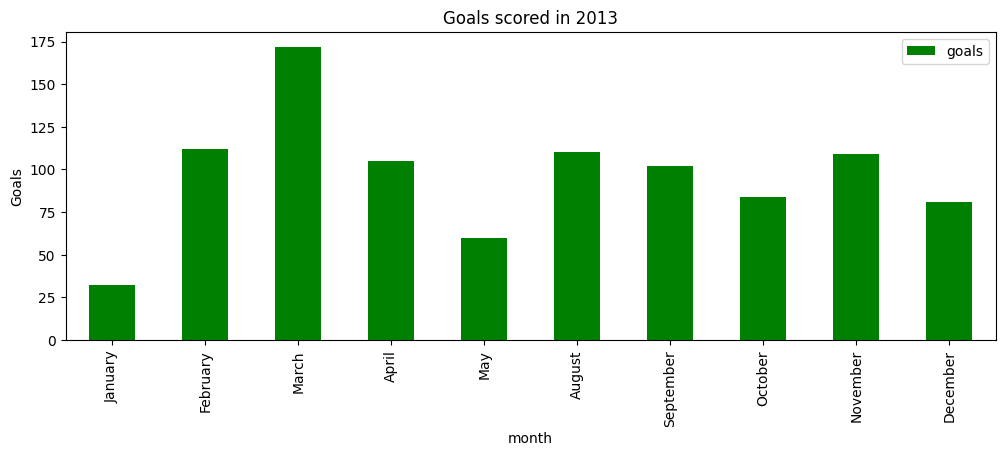

In [ ]:
plotbundesligamonthly(bundesliga_monthly_2013.toPandas()['month'],
                      2013,
                      bundesliga_monthly_2013.toPandas())

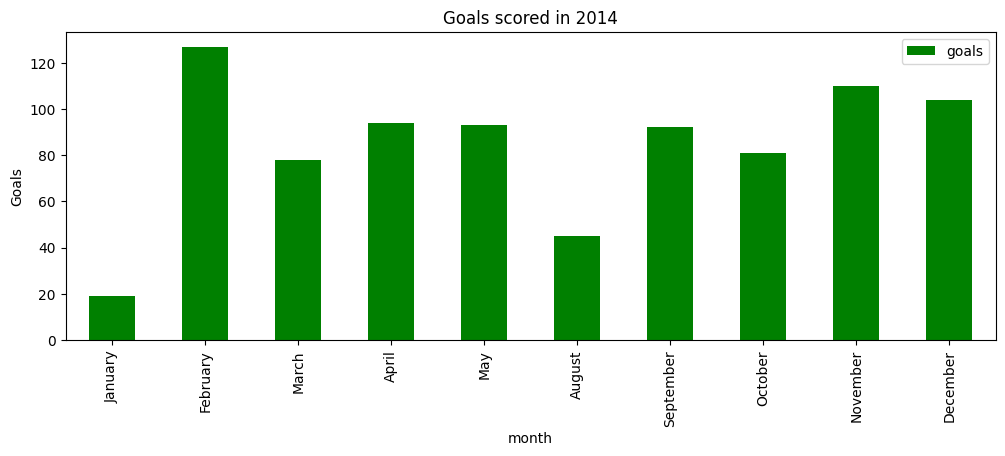

In [ ]:
plotbundesligamonthly(bundesliga_monthly_2014.toPandas()['month'],
                      2014,
                      bundesliga_monthly_2014.toPandas())

**This specific function call generates and displays a bar chart showing the goals scored in each month for the year 2014 in Bundesliga football matches. The data used for plotting is extracted from the bundesliga_monthly_2014 PySpark DataFrame, and the resulting plot provides insights into the distribution of goals over the months of that particular year.**

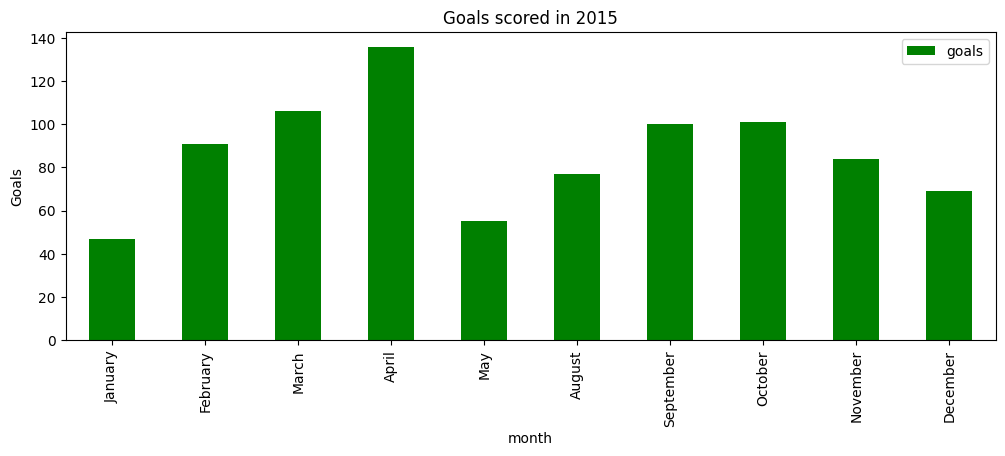

In [ ]:
plotbundesligamonthly(bundesliga_monthly_2015.toPandas()['month'],
                      2015,
                      bundesliga_monthly_2015.toPandas())

**This specific function call generates and displays a bar chart showing the goals scored in each month for the year 2015 in Bundesliga football matches. The data used for plotting is extracted from the bundesliga_monthly_2015**

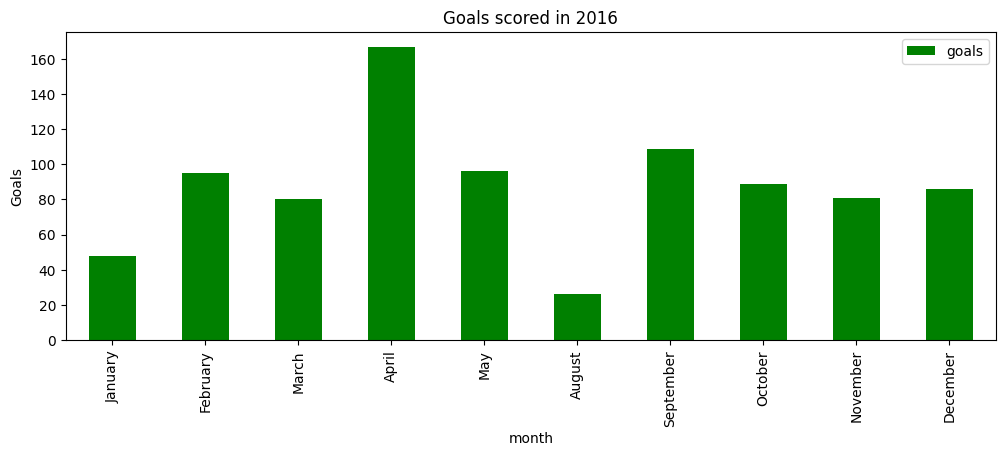

In [ ]:
plotbundesligamonthly(bundesliga_monthly_2016.toPandas()['month'],
                      2016,
                      bundesliga_monthly_2016.toPandas())

**The function call generates and displays a bar chart showing the goals scored in each month for the year 2016 in Bundesliga football matches. The data used for plotting is extracted from the bundesliga_monthly_2016**

**That concluded that octoberfest doesn't affect bundesliga performance, there is no significantly behavior change in goals scored.**

**Q4. Which season of bundesliga was the most competitive in the last decade?**

In [ ]:
#using team_details from Q2
teamposition1= team_details.filter((col('teamposition')==1))
teamposition2= team_details.filter((col('teamposition')==2))
teamposition3= team_details.filter((col('teamposition')==3))
teamposition4= team_details.filter((col('teamposition')==4))
teamposition1.toPandas()

,Season,team,goalsscored,goalsagainst,goaldifferentials,win,loss,tie,totalpoints,teamposition
0,2007,Bayern Munich,68.0,21.0,47.0,22,2,10,76,1
1,2008,Wolfsburg,80.0,41.0,39.0,21,7,6,69,1
2,2009,Bayern Munich,72.0,31.0,41.0,20,4,10,70,1
3,2010,Dortmund,67.0,22.0,45.0,23,5,6,75,1
4,2011,Dortmund,80.0,25.0,55.0,25,3,6,81,1
5,2012,Bayern Munich,98.0,18.0,80.0,29,1,4,91,1
6,2013,Bayern Munich,94.0,23.0,71.0,29,2,3,90,1
7,2014,Bayern Munich,80.0,18.0,62.0,25,5,4,79,1
8,2015,Bayern Munich,80.0,17.0,63.0,28,2,4,88,1
9,2016,Bayern Munich,89.0,22.0,67.0,25,2,7,82,1


**Used to extract and display information about football teams that finished in specific positions (1st, 2nd, 3rd, and 4th) in the league, using the team_details DataFrame. Depending on the specific use case, this information can be further analyzed, visualized, or reported.**

In [ ]:

competition_table= teamposition1.alias('first').join(teamposition2.alias('second'), 'Season', how = 'inner') \
                      .join(teamposition3.alias('third'), 'Season', how= 'inner') \
                      .join(teamposition4.alias('fourth'), 'Season', how='inner') \
                      .withColumn('winner', col('first.team')) \
                      .withColumn('pointsdiff_1-2', col('first.totalpoints')- col('second.totalpoints')) \
                      .withColumn('pointsdiff_1-3', col('first.totalpoints')- col('third.totalpoints')) \
                      .withColumn('pointsdiff_1-4', col('first.totalpoints')- col('fourth.totalpoints')) \
                      .drop('goalsscored', 'goalsagainst', 'goaldifferentials', 'win', 'loss', 'tie') \
                      .drop('team', 'teamposition', 'totalpoints')


competition_table.sort(['pointsdiff_1-2', 'pointsdiff_1-3', 'pointsdiff_1-4']).toPandas()

,Season,winner,pointsdiff_1-2,pointsdiff_1-3,pointsdiff_1-4
0,2008,Wolfsburg,2,5,6
1,2009,Bayern Munich,5,9,11
2,2010,Dortmund,7,10,15
3,2011,Dortmund,8,17,21
4,2007,Bayern Munich,10,12,22
5,2014,Bayern Munich,10,13,18
6,2015,Bayern Munich,10,28,33
7,2016,Bayern Munich,15,18,20
8,2013,Bayern Munich,19,26,29
9,2012,Bayern Munich,25,26,36


**Creates a DataFrame (competition_table) that represents a competition between teams finishing in the 1st, 2nd, 3rd, and 4th positions in a football league for multiple seasons. It calculates point differences, determines the winner (team in the 1st position), and organizes the data for analysis. The resulting Pandas DataFrame is sorted based on point differences, providing insights into the competitiveness of the league across seasons**

**The most competitive season of bundesliga in last decade was 2008. In 2008 Wolfsburg was champion by a 2 points lead from second place.**

**Q5. What's the best month to watch Bundesliga?**

In [ ]:
bundesliga_monthly= bundesliga_monthly_table.groupBy('Season', 'month', 'monthnum') \
                                              .agg(sum('hometeamgoals').alias('homegoals'),
                                                   sum('awayteamgoals').alias('awaygoals'),
                                                   sum('gametie').alias('ties'),
                                                   sum('hometeamwin').alias('hometeamwin'),
                                                   sum('awayteamwin').alias('awayteamwin'))

bundesliga_monthly = bundesliga_monthly \
                                .withColumn('not_tie', col('hometeamwin')+col('awayteamwin')) \
                                .withColumn('goals', col('homegoals')+ col('awaygoals')) \
                                .sort('Season', 'monthnum') \
                                .drop('homegoals', 'awaygoals','monthnum', 'hometeamwin', 'awayteamwin')
bundesliga_monthly.toPandas()

,Season,month,ties,not_tie,goals
0,2007,February,11,26,103.0
1,2007,March,18,26,106.0
2,2007,April,8,28,101.0
3,2007,May,6,30,119.0
4,2007,August,6,22,75.0
...,...,...,...,...,...
104,2017,August,0,18,-36.0
105,2017,September,0,36,-72.0
106,2017,October,0,36,-72.0
107,2017,November,0,27,-54.0


**PySpark DataFrame containing monthly data for Bundesliga matches, aggregates various statistics, calculates additional columns, sorts the data, drops unnecessary columns, and then converts the resulting DataFrame to a Pandas DataFrame for further analysis or reporting**

In [ ]:
window = Window.partitionBy('Season').orderBy(col('goalspermatch').desc())

best_month_df = bundesliga_monthly \
                  .filter((col('Season')>=2006)& (col('Season')<=2016)) \
                  .withColumn('goalspermatch', col('goals')/(col('ties')+col('not_tie'))) \
                  .withColumn('rankgoalspermatch',rank().over(window))

best_month_df = best_month_df.sort('Season', 'goalspermatch', ascending=False)
best_month_df.toPandas()

,Season,month,ties,not_tie,goals,goalspermatch,rankgoalspermatch
0,2016,May,12,15,96.0,3.555556,1
1,2016,April,10,43,167.0,3.150943,2
2,2016,November,7,20,81.0,3.000000,3
3,2016,September,8,29,109.0,2.945946,4
4,2016,August,2,7,26.0,2.888889,5
...,...,...,...,...,...,...,...
94,2007,April,8,28,101.0,2.805556,5
95,2007,February,11,26,103.0,2.783784,6
96,2007,August,6,22,75.0,2.678571,7
97,2007,March,18,26,106.0,2.409091,8


In [ ]:
best_month_df.select('*').where((col('rankgoalspermatch')==1)) \
      .toPandas()

,Season,month,ties,not_tie,goals,goalspermatch,rankgoalspermatch
0,2016,May,12,15,96.0,3.555556,1
1,2015,April,9,35,136.0,3.090909,1
2,2014,November,3,32,110.0,3.142857,1
3,2013,September,8,21,102.0,3.517241,1
4,2012,May,8,19,92.0,3.407407,1
5,2011,May,0,9,35.0,3.888889,1
6,2010,August,1,17,67.0,3.722222,1
7,2009,December,10,17,82.0,3.037037,1
8,2008,September,5,21,84.0,3.230769,1
9,2007,May,6,30,119.0,3.305556,1


**analyzes Bundesliga match data to find the best-performing month in terms of goals scored per match for each season from 2006 to 2016. It calculates 'goalspermatch' for each month, ranks them within each season, and displays the results, including the best month per season.**